# Generating Synthetic Power Grids topologies using ERG 

In [2]:
#importing libraries

import load_pglib_opf as lp
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pg_utils as sc
from tqdm import tqdm
import pg_ergm_eest as est
import pg_ham_comp as hc
import matplotlib.pylab as pylab

### Reference Grid selection

In [3]:
mod_type = '_edg_tri_2tri'
obs_comp = getattr(hc,'obs'+mod_type)
fast_obs_comp = getattr(hc,'fast_obs'+mod_type)
name='118_ieee'
rmean_list=[]

In [4]:
#create file used to store the estimation results
file = open("data3_"+name+mod_type+".txt", "w")
file.write("Simulation data on grid "+name+" for model "+mod_type+"\n")

#parsing the .m file into a suitable format, and perform some sanity checks
ordmat,ordlist,buslist,countlist = lp.pow_parser(name)
print("Number of connecetd components in the graph:" ,nx.number_connected_components(nx.from_numpy_matrix(ordmat)))
k1,k2,k3,q1,q2,q3 = hc.avg_degreetype(ordmat,ordlist)
genobs = hc.obs_edg_tri_2tri(ordmat,q1,q2,q3)
countlist = [q1,q2,q3]
print(countlist)

Number of connecetd components in the graph: 1
[54, 56, 8]


### Parameter Estimation

In [5]:
#generate a starting point for the betas estimation
obs,betas = hc.comp_obs_and_betas(mod_type,ordmat,ordlist,countlist,startguess=np.array([1, -1]))
n = len(ordmat)
startconn1 = est.generate_connected_adj(n)
randper = np.random.permutation(n)
startconn = est.reorder_rows(startconn1,randper)
mix = n*n*np.log(n)
print(betas)
step = int(n/3)

100%|██████████████████████████████████████████████████████████████████████████| 35400/35400 [00:10<00:00, 3399.92it/s]


no convergence
48.503979911784306
84.4378631230375
12.062551874719643
22.75200880764068
9.802809379386543
2.0279415901225053
[-3.685 -3.905 -3.905 -4.62  -4.18  -2.805  1.    -1.   ]


In [6]:
#estimate the betas using Equilibrium Expectation
betas = np.array([-2,-2,-2,-2,-2,-2,1,-1])
EEparams,obslist,parlist = est.EEsparse(ordmat,obs,betas,countlist,obs_comp,fast_obs_comp,10000000,0.001,0.001,step)

  0%|▏                                                                     | 22564/10000000 [00:04<14:24, 11536.98it/s]

[-2.20802337 -2.20802337 -2.20802337 -2.20802337 -2.20802337 -2.10876759
  0.90569784 -1.09193465]


  0%|▎                                                                     | 46453/10000000 [00:05<12:45, 13006.05it/s]

[-2.43768361 -2.43768361 -2.43768361 -2.43768361 -2.43768361 -2.30264791
  0.82028859 -1.20550861]


  1%|▌                                                                     | 75082/10000000 [00:08<11:53, 13913.13it/s]

[-2.69123119 -2.69123119 -2.69123119 -2.69123119 -2.69123119 -2.44004321
  0.7429336  -1.26725682]


  1%|▋                                                                    | 108266/10000000 [00:10<10:41, 15428.86it/s]

[-2.97115068 -2.97115068 -2.97115068 -2.97115068 -2.97115068 -2.36548775
  0.67287336 -1.18034534]


  2%|█                                                                    | 153319/10000000 [00:13<09:37, 17049.03it/s]

[-3.23782349 -3.28018507 -3.28018507 -3.28018507 -3.27690816 -2.43013727
  0.64905154 -1.06903623]


  2%|█▍                                                                   | 212218/10000000 [00:16<08:32, 19101.92it/s]

[-3.41048789 -3.62136265 -3.51786007 -3.62136265 -3.52490283 -2.54444553
  0.7151288  -0.96822381]


  3%|█▉                                                                   | 282784/10000000 [00:20<08:17, 19546.57it/s]

[-3.49316907 -3.79924892 -3.59954474 -3.99802669 -3.74645624 -2.52913098
  0.78951055 -0.87691822]


  4%|██▍                                                                  | 360858/10000000 [00:24<08:16, 19415.65it/s]

[-3.49299791 -3.71640345 -3.68681295 -4.30920502 -3.90699448 -2.44204608
  0.87162888 -0.79422294]


  4%|███                                                                  | 439464/10000000 [00:29<08:50, 18024.81it/s]

[-3.5103434  -3.82940101 -3.64631796 -4.44023564 -4.09892777 -2.56459293
  0.96228847 -0.719326  ]


  5%|███▌                                                                 | 523180/10000000 [00:33<08:55, 17692.56it/s]

[-3.65343522 -3.79111205 -3.7309817  -4.57982577 -3.98559021 -2.59806326
  1.06237771 -0.65149201]


  6%|████▏                                                                | 606769/10000000 [00:39<08:55, 17547.70it/s]

[-3.66058834 -3.83670298 -3.67161413 -4.57046046 -4.0659378  -2.75861099
  1.17287741 -0.59005491]


  7%|████▊                                                                | 695711/10000000 [00:44<08:29, 18268.17it/s]

[-3.59512182 -3.817386   -3.79082773 -4.52025068 -3.94164405 -2.88835259
  1.29487037 -0.53441146]


  8%|█████▎                                                               | 778782/10000000 [00:48<07:25, 20697.52it/s]

[-3.71185179 -3.945274   -3.94535685 -4.55634813 -4.10232514 -2.84524107
  1.4210018  -0.48401531]


  9%|██████                                                               | 872085/10000000 [00:53<07:22, 20626.51it/s]

[-3.66373963 -3.87083366 -3.79049794 -4.60193772 -3.98888567 -3.0240903
  1.56880259 -0.43837162]


 10%|██████▌                                                              | 951953/10000000 [00:57<07:39, 19702.50it/s]

[-3.86683135 -3.93700943 -3.89016433 -4.75135323 -4.09785809 -2.8678792
  1.70108652 -0.40102328]


 10%|███████                                                             | 1038013/10000000 [01:01<08:41, 17183.45it/s]

[-3.7561327  -3.96446894 -3.98847882 -4.74639778 -4.19301031 -2.94331003
  1.84636752 -0.36539171]


 11%|███████▋                                                            | 1125231/10000000 [01:06<06:58, 21215.42it/s]

[-3.85875811 -4.0241971  -4.02435003 -4.59671059 -4.25617314 -2.99664945
  1.91970728 -0.34999625]


 12%|████████▏                                                           | 1209003/10000000 [01:10<07:08, 20516.89it/s]

[-3.91688974 -4.07665548 -4.14671902 -4.63807524 -4.33762489 -2.99952612
  1.96428287 -0.33659314]


 13%|████████▊                                                           | 1297932/10000000 [01:14<07:20, 19775.14it/s]

[-3.79336654 -4.0561304  -4.11349249 -4.6704525  -4.34177582 -2.89914337
  2.0443548  -0.31952193]


 14%|█████████▍                                                          | 1385157/10000000 [01:19<07:40, 18709.26it/s]

[-3.84281972 -4.01959404 -4.17967054 -4.92935911 -4.19645209 -2.86732288
  2.04630502 -0.31569605]


 15%|█████████▉                                                          | 1468787/10000000 [01:23<08:02, 17677.51it/s]

[-3.93204995 -4.12940951 -4.0276735  -4.71224041 -4.35007654 -2.89605308
  2.08963466 -0.30788655]


 16%|██████████▌                                                         | 1560259/10000000 [01:28<07:29, 18786.04it/s]

[-3.94762806 -4.10451842 -4.11708307 -4.80241047 -4.32820946 -2.93678019
  2.14243655 -0.30087138]


 16%|███████████▏                                                        | 1648672/10000000 [01:32<06:57, 20012.42it/s]

[-3.8154816  -4.02306244 -4.12926912 -4.93856094 -4.44201431 -3.05650719
  2.15307328 -0.29608183]


 17%|███████████▊                                                        | 1737390/10000000 [01:37<06:48, 20244.63it/s]

[-3.9433058  -4.09593255 -4.03116902 -4.80678025 -4.26338921 -3.07785623
  2.12303836 -0.29934249]


 18%|████████████▍                                                       | 1826228/10000000 [01:41<07:02, 19325.47it/s]

[-4.01072857 -4.12450875 -4.11654377 -4.75399334 -4.18296751 -3.13361513
  2.12081564 -0.2981332 ]


 19%|█████████████                                                       | 1915997/10000000 [01:46<06:54, 19518.75it/s]

[-3.89201455 -4.18246559 -4.16189469 -4.83046132 -4.31016392 -3.04697508
  2.12709086 -0.30262484]


 20%|█████████████▋                                                      | 2009947/10000000 [01:51<07:00, 19004.80it/s]

[-3.93094913 -4.11177752 -4.0752289  -4.86905064 -4.24156341 -3.13024986
  2.16345992 -0.302006  ]


 21%|██████████████▎                                                     | 2103251/10000000 [01:56<06:34, 20022.03it/s]

[-3.87999708 -4.14046427 -3.97443027 -4.81075469 -4.26688876 -3.13330491
  2.17637742 -0.29898664]


 22%|██████████████▉                                                     | 2191523/10000000 [02:01<06:01, 21602.93it/s]

[-3.86046599 -4.14856679 -4.17801154 -4.82498909 -4.54415801 -3.10204114
  2.15462729 -0.30047104]


 23%|███████████████▌                                                    | 2284961/10000000 [02:06<06:54, 18630.16it/s]

[-3.89907717 -4.14837596 -4.1074275  -4.81994238 -4.37452718 -2.9654382
  2.18927571 -0.30105813]


 24%|████████████████▏                                                   | 2373026/10000000 [02:11<06:22, 19928.77it/s]

[-3.85238678 -4.14403281 -4.36122482 -4.80528076 -4.40947416 -3.01615644
  2.12659956 -0.30990255]


 25%|████████████████▋                                                   | 2462170/10000000 [02:16<07:11, 17475.80it/s]

[-4.09860601 -4.2148834  -4.18167518 -4.73353352 -4.48486749 -3.06773905
  2.07607116 -0.31678107]


 26%|█████████████████▍                                                  | 2556106/10000000 [02:20<05:47, 21427.33it/s]

[-4.13546353 -4.11062227 -4.18566849 -4.73806331 -4.67236545 -3.0984557
  2.07389762 -0.31613296]


 26%|█████████████████▉                                                  | 2645277/10000000 [02:25<06:10, 19876.04it/s]

[-3.9218046  -4.0370992  -4.16876749 -4.84808594 -4.6535039  -3.16095069
  2.15196904 -0.30493995]


 27%|██████████████████▌                                                 | 2735384/10000000 [02:29<05:47, 20922.99it/s]

[-4.02491549 -4.20585637 -4.02119215 -4.6484692  -4.35611428 -3.10446323
  2.14972033 -0.30614838]


 28%|███████████████████▏                                                | 2828302/10000000 [02:34<05:47, 20626.07it/s]

[-3.94898035 -4.19725579 -4.21872702 -4.79462966 -4.4394742  -3.05814133
  2.14532435 -0.30766834]


 29%|███████████████████▊                                                | 2917805/10000000 [02:39<05:43, 20636.96it/s]

[-3.97653926 -4.28613517 -4.23544513 -4.79920353 -4.33834717 -2.9147041
  2.1430783  -0.30156162]


 30%|████████████████████▍                                               | 3008665/10000000 [02:43<05:42, 20416.01it/s]

[-4.01630736 -4.15510594 -4.16805052 -4.76551433 -4.32516348 -3.07323522
  2.14941724 -0.29974358]


 31%|█████████████████████                                               | 3097760/10000000 [02:48<06:19, 18206.60it/s]

[-4.10546051 -4.02808233 -4.17620285 -4.81320159 -4.44777934 -3.10711713
  2.1687463  -0.29943066]


 32%|█████████████████████▋                                              | 3188366/10000000 [02:53<06:21, 17857.22it/s]

[-4.02397377 -4.11337114 -4.25611994 -4.8274384  -4.43869736 -3.30902256
  2.18606311 -0.29792279]


 33%|██████████████████████▎                                             | 3281764/10000000 [02:57<06:06, 18346.84it/s]

[-4.00771764 -4.16282914 -3.98012175 -4.90997318 -4.35933682 -3.31883676
  2.236819   -0.29142666]


 34%|██████████████████████▉                                             | 3370974/10000000 [03:02<05:58, 18497.15it/s]

[-4.03164674 -4.20867314 -4.09295588 -4.72196    -4.56434927 -3.17584054
  2.20561584 -0.29434112]


 35%|███████████████████████▌                                            | 3460816/10000000 [03:07<05:41, 19151.94it/s]

[-4.00733692 -4.18748337 -4.2512856  -4.89972695 -4.36330344 -3.18206811
  2.19890666 -0.29227404]


 36%|████████████████████████▏                                           | 3555176/10000000 [03:12<05:37, 19072.87it/s]

[-4.09218648 -4.07166464 -4.21299556 -4.8653175  -4.3413612  -3.16292216
  2.17258186 -0.29667711]


 37%|████████████████████████▊                                           | 3651922/10000000 [03:17<05:21, 19744.38it/s]

[-4.11661581 -4.20806713 -4.092387   -4.75448065 -4.20445605 -3.21382025
  2.17248193 -0.29696013]


 37%|█████████████████████████▍                                          | 3740473/10000000 [03:22<05:36, 18586.47it/s]

[-3.98677411 -4.29288257 -4.10449584 -4.92854829 -4.28919013 -3.21369813
  2.16803507 -0.29635346]


 38%|██████████████████████████                                          | 3831023/10000000 [03:26<05:25, 18929.50it/s]

[-4.01460882 -4.10379403 -4.26753951 -4.75880682 -4.39758023 -3.34137985
  2.1941029  -0.29076209]


 39%|██████████████████████████▋                                         | 3917574/10000000 [03:31<04:58, 20382.29it/s]

[-4.05475763 -4.22856601 -4.37102022 -4.83535706 -4.50418269 -3.15928215
  2.14411259 -0.29721577]


 40%|███████████████████████████▎                                        | 4011263/10000000 [03:36<04:48, 20745.01it/s]

[-4.01823364 -4.19467946 -4.23317131 -4.93773874 -4.63651942 -3.03530168
  2.16123703 -0.2972015 ]


 41%|███████████████████████████▉                                        | 4103569/10000000 [03:42<05:31, 17766.16it/s]

[-4.04223362 -4.21550093 -4.21187084 -4.75815967 -4.44118151 -3.08414301
  2.19599174 -0.28754025]


 42%|████████████████████████████▌                                       | 4194581/10000000 [03:47<05:21, 18031.83it/s]

[-4.09084037 -4.24067066 -4.28818229 -4.79136084 -4.37050009 -3.03507707
  2.19809101 -0.28637893]


 43%|█████████████████████████████▏                                      | 4289093/10000000 [03:53<05:55, 16078.08it/s]

[-3.93418563 -4.13991983 -4.14880949 -4.8393019  -4.46304357 -3.09008261
  2.26945854 -0.2792955 ]


 44%|█████████████████████████████▊                                      | 4376709/10000000 [03:57<04:41, 19953.07it/s]

[-4.01748632 -4.22335328 -4.32226226 -4.81977609 -4.48072538 -3.25488467
  2.18910604 -0.28692615]


 45%|██████████████████████████████▍                                     | 4468653/10000000 [04:02<04:58, 18501.39it/s]

[-4.14793004 -4.0819892  -4.28334152 -4.88750759 -4.48052823 -3.10534347
  2.17808219 -0.28691266]


 46%|███████████████████████████████                                     | 4561891/10000000 [04:07<04:36, 19675.93it/s]

[-4.11880026 -4.10636997 -4.07426115 -4.77615567 -4.31758594 -3.1521849
  2.23534766 -0.28489804]


 47%|███████████████████████████████▌                                    | 4650187/10000000 [04:11<04:34, 19508.05it/s]

[-4.01290297 -4.25669242 -4.17303849 -4.88218066 -4.33036978 -3.16786333
  2.17352823 -0.28919056]


 47%|████████████████████████████████▎                                   | 4742684/10000000 [04:16<04:21, 20077.35it/s]

[-3.99269887 -4.14311501 -4.25289927 -4.73294896 -4.30429317 -3.11747796
  2.20187058 -0.28802286]


 48%|████████████████████████████████▉                                   | 4835706/10000000 [04:21<04:12, 20480.89it/s]

[-4.0165383  -4.08124634 -4.10232924 -4.72328469 -4.43076141 -3.21553528
  2.2105918  -0.29559547]


 49%|█████████████████████████████████▍                                  | 4924809/10000000 [04:25<04:07, 20473.75it/s]

[-4.0486092  -4.08921663 -4.24402848 -4.90600262 -4.49303513 -3.31002701
  2.13232141 -0.30488766]


 50%|██████████████████████████████████                                  | 5016959/10000000 [04:30<04:07, 20103.98it/s]

[-4.0646491  -4.13838834 -4.05709182 -5.02493987 -4.43925889 -3.36664215
  2.13222333 -0.31072146]


 51%|██████████████████████████████████▋                                 | 5105515/10000000 [04:35<04:17, 19014.52it/s]

[-4.10530656 -4.10521624 -4.22669316 -4.80361122 -4.54690806 -3.28337989
  2.16218494 -0.303642  ]


 52%|███████████████████████████████████▎                                | 5200767/10000000 [04:39<04:02, 19766.13it/s]

[-3.95995795 -4.18375817 -4.14282086 -4.84682802 -4.42559151 -3.17666478
  2.21459881 -0.30030628]


 53%|███████████████████████████████████▉                                | 5291291/10000000 [04:44<04:43, 16621.55it/s]

[-3.94397227 -4.23830926 -4.19686336 -4.81279007 -4.43868626 -3.21810069
  2.24122652 -0.29464003]


 54%|████████████████████████████████████▌                               | 5384398/10000000 [04:49<03:56, 19534.17it/s]

[-3.96752474 -4.15834818 -4.32881978 -4.85606518 -4.44294723 -3.06716083
  2.225487   -0.29937782]


 55%|█████████████████████████████████████▏                              | 5473217/10000000 [04:53<03:42, 20305.07it/s]

[-4.092254   -4.21256796 -4.26417374 -4.82198165 -4.54615788 -3.25994017
  2.19884179 -0.2916806 ]


 56%|█████████████████████████████████████▊                              | 5562918/10000000 [04:58<03:46, 19591.17it/s]

[-4.04729766 -4.13308839 -4.21314512 -4.87021448 -4.27695768 -3.19845006
  2.26796799 -0.28135363]


 57%|██████████████████████████████████████▍                             | 5655566/10000000 [05:03<03:43, 19432.19it/s]

[-4.00685006 -4.21216357 -4.02758086 -4.71663191 -4.31974312 -3.28255914
  2.23186435 -0.28530716]


 57%|███████████████████████████████████████                             | 5744905/10000000 [05:08<03:32, 20035.10it/s]

[-4.18689926 -4.116198   -4.13348105 -4.79728663 -4.54555782 -3.38578185
  2.13996667 -0.29842507]


 58%|███████████████████████████████████████▋                            | 5836059/10000000 [05:12<03:25, 20293.52it/s]

[-4.02656201 -4.19077603 -4.17066471 -5.02288006 -4.48216617 -3.32195462
  2.18309863 -0.29162664]


 59%|████████████████████████████████████████▎                           | 5928715/10000000 [05:17<03:45, 18037.61it/s]

[-3.97040819 -4.22847086 -4.24623382 -4.77771056 -4.4329574  -3.31521789
  2.16343613 -0.29248894]


 60%|████████████████████████████████████████▉                           | 6019162/10000000 [05:22<03:09, 20981.96it/s]

[-3.95833075 -4.17366241 -4.16612324 -4.92791009 -4.513261   -3.36857348
  2.15254584 -0.2910172 ]


 61%|█████████████████████████████████████████▌                          | 6106454/10000000 [05:26<03:40, 17661.93it/s]

[-3.97799097 -4.11132524 -4.06308857 -4.85432702 -4.46819689 -3.18818834
  2.24476821 -0.27681111]


 62%|██████████████████████████████████████████▏                         | 6197790/10000000 [05:31<03:02, 20865.25it/s]

[-3.9937391  -4.169101   -4.02651772 -4.71066678 -4.40588851 -3.17850619
  2.22233016 -0.27874206]


 63%|██████████████████████████████████████████▊                         | 6288342/10000000 [05:35<03:00, 20583.23it/s]

[-4.06202012 -4.22345253 -4.04652875 -4.7482896  -4.26693996 -3.17204133
  2.17170106 -0.28096802]


 64%|███████████████████████████████████████████▍                        | 6380028/10000000 [05:40<02:57, 20349.83it/s]

[-3.98937034 -4.16870078 -4.13222467 -4.88777885 -4.37476341 -3.14034709
  2.16943173 -0.28095538]


 65%|████████████████████████████████████████████                        | 6471920/10000000 [05:45<02:55, 20117.08it/s]

[-4.03331216 -4.2911679  -4.24936233 -4.78599273 -4.38771654 -3.08113435
  2.11154044 -0.29065845]


 66%|████████████████████████████████████████████▋                       | 6566018/10000000 [05:50<02:55, 19532.77it/s]

[-4.03715168 -4.20599937 -4.22800576 -4.71452876 -4.31356814 -2.87845819
  2.12840048 -0.28746536]


 67%|█████████████████████████████████████████████▎                      | 6657835/10000000 [05:54<02:42, 20579.07it/s]

[-4.05314213 -4.2184275  -4.02162646 -4.88710927 -4.31768309 -2.79888127
  2.11345542 -0.29121385]


 67%|█████████████████████████████████████████████▉                      | 6748257/10000000 [05:59<03:06, 17467.37it/s]

[-3.99660564 -4.18881102 -4.05781202 -4.78054698 -4.48473294 -2.91299513
  2.13459568 -0.28686461]


 68%|██████████████████████████████████████████████▍                     | 6837080/10000000 [06:03<02:37, 20081.37it/s]

[-4.01243549 -4.23071043 -4.14789478 -4.72332011 -4.53867425 -3.03783114
  2.11537637 -0.29293826]


 69%|███████████████████████████████████████████████▏                    | 6932774/10000000 [06:08<03:11, 16004.97it/s]

[-3.85877933 -4.15088856 -4.21460944 -4.90602469 -4.50230258 -2.90695693
  2.1709932  -0.28769902]


 70%|███████████████████████████████████████████████▊                    | 7022203/10000000 [06:13<02:20, 21120.04it/s]

[-3.92082427 -4.15069763 -4.06540723 -4.87157589 -4.4573167  -2.92140687
  2.11306024 -0.29674446]


 71%|████████████████████████████████████████████████▍                   | 7117775/10000000 [06:18<02:21, 20352.02it/s]

[-3.97591102 -4.1504984  -3.97279314 -4.71322773 -4.43489281 -3.04051929
  2.14704237 -0.29319132]


 72%|████████████████████████████████████████████████▉                   | 7203710/10000000 [06:22<02:20, 19837.82it/s]

[-3.91262656 -4.08035061 -4.15132443 -4.52822012 -4.45245864 -3.20909298
  2.16852293 -0.2882355 ]


 73%|█████████████████████████████████████████████████▌                  | 7290965/10000000 [06:27<02:21, 19124.88it/s]

[-3.98749179 -4.12940745 -4.11395116 -4.64263671 -4.18460128 -3.20257873
  2.13613848 -0.29228544]


 74%|██████████████████████████████████████████████████▏                 | 7378850/10000000 [06:31<02:13, 19612.31it/s]

[-3.98730837 -4.18743312 -4.12199769 -4.86583325 -4.13863458 -3.15161283
  2.10003339 -0.29847387]


 75%|██████████████████████████████████████████████████▊                 | 7466206/10000000 [06:36<02:01, 20864.44it/s]

[-3.99510719 -4.19561498 -4.19247573 -4.95399827 -4.38555832 -3.28337496
  2.09993679 -0.29167462]


 76%|███████████████████████████████████████████████████▍                | 7560215/10000000 [06:40<02:27, 16583.87it/s]

[-3.91580686 -4.1996216  -4.19649195 -4.90940365 -4.31575352 -3.2343738
  2.1422598  -0.28875884]


 77%|████████████████████████████████████████████████████                | 7650672/10000000 [06:45<01:56, 20238.15it/s]

[-4.09995673 -4.09982963 -4.21734772 -4.84092334 -4.37641082 -3.27328918
  2.10184335 -0.29516805]


 77%|████████████████████████████████████████████████████▌               | 7737456/10000000 [06:49<02:01, 18569.34it/s]

[-4.06709269 -4.15743968 -4.20872364 -5.00311634 -4.20463264 -3.10421798
  2.09754947 -0.29485903]


 78%|█████████████████████████████████████████████████████▏              | 7828973/10000000 [06:54<01:52, 19300.28it/s]

[-4.03852253 -4.06272088 -4.08006907 -4.9185584  -4.39797163 -3.16999285
  2.17868996 -0.28670401]


 79%|█████████████████████████████████████████████████████▊              | 7915361/10000000 [06:59<01:44, 19998.39it/s]

[-3.98617215 -4.09106946 -4.26341692 -4.83058933 -4.7119459  -3.34239244
  2.12055585 -0.29365405]


 80%|██████████████████████████████████████████████████████▍             | 8009669/10000000 [07:04<01:40, 19799.26it/s]

[-4.0139866  -4.18605568 -4.23771806 -4.85459644 -4.39317826 -3.29580961
  2.1439089  -0.29393389]


 81%|███████████████████████████████████████████████████████             | 8104643/10000000 [07:08<01:29, 21194.52it/s]

[-3.94221168 -4.15667063 -4.12877157 -4.91298637 -4.38860076 -3.30890013
  2.21573076 -0.28694968]


 82%|███████████████████████████████████████████████████████▋            | 8196819/10000000 [07:13<01:45, 17058.30it/s]

[-3.87945586 -4.14402245 -4.07525947 -4.88338183 -4.46811423 -3.24001948
  2.17392384 -0.28953042]


 83%|████████████████████████████████████████████████████████▍           | 8290611/10000000 [07:18<01:22, 20698.32it/s]

[-3.94973665 -4.24872709 -4.02244092 -4.96687308 -4.20353117 -3.12222481
  2.15218963 -0.29213466]


 84%|████████████████████████████████████████████████████████▉           | 8381532/10000000 [07:22<01:17, 20765.34it/s]

[-3.98128212 -4.14362879 -4.24119229 -4.74811154 -4.35307477 -3.02075958
  2.14994069 -0.29212093]


 85%|█████████████████████████████████████████████████████████▌          | 8470562/10000000 [07:27<01:18, 19506.13it/s]

[-3.93754096 -4.14342575 -4.30939462 -4.96144973 -4.4854528  -3.08478149
  2.13057895 -0.29065104]


 86%|██████████████████████████████████████████████████████████▏         | 8564837/10000000 [07:31<01:10, 20362.97it/s]

[-4.05320901 -4.19743837 -4.25355001 -4.8097758  -4.43175844 -3.12192509
  2.10928019 -0.29502965]


 87%|██████████████████████████████████████████████████████████▊         | 8657668/10000000 [07:36<01:06, 20233.77it/s]

[-3.94111196 -4.13475023 -4.30042319 -4.96098338 -4.44490255 -2.98740409
  2.14534473 -0.28773168]


 87%|███████████████████████████████████████████████████████████▍        | 8746677/10000000 [07:40<01:03, 19783.89it/s]

[-3.92913934 -4.20965176 -4.31314759 -4.86739787 -4.35669586 -3.12479702
  2.14953869 -0.29002913]


 88%|████████████████████████████████████████████████████████████        | 8834930/10000000 [07:45<01:00, 19186.72it/s]

[-4.05265376 -4.28162852 -4.25299709 -4.85746392 -4.51169742 -3.10912342
  2.11320288 -0.29381105]


 89%|████████████████████████████████████████████████████████████▋       | 8930488/10000000 [07:50<00:55, 19439.99it/s]

[-3.81264965 -4.11354596 -4.17694837 -4.89137269 -4.41332531 -3.11212361
  2.21479149 -0.27891048]


 90%|█████████████████████████████████████████████████████████████▎      | 9012297/10000000 [07:54<00:56, 17591.65it/s]

[-4.0482327  -4.18805919 -4.23565055 -4.92549846 -4.4396984  -3.26829304
  2.12784824 -0.28796584]


 91%|█████████████████████████████████████████████████████████████▉      | 9107810/10000000 [07:59<00:44, 19923.95it/s]

[-3.90881361 -4.31539748 -4.20170303 -4.76539281 -4.47517944 -3.54389134
  2.15990396 -0.28084288]


 92%|██████████████████████████████████████████████████████████████▌     | 9200451/10000000 [08:04<00:40, 19613.62it/s]

[-3.94397227 -4.0395949  -4.18056509 -5.01953343 -4.45712726 -3.38444981
  2.22113375 -0.27831369]


 93%|███████████████████████████████████████████████████████████████▏    | 9291729/10000000 [08:09<00:34, 20694.96it/s]

[-3.96355721 -4.20004789 -4.08533576 -4.8515099  -4.17227907 -3.34060474
  2.22547364 -0.27913662]


 94%|███████████████████████████████████████████████████████████████▊    | 9381078/10000000 [08:13<00:30, 20162.02it/s]

[-3.98722265 -4.08388572 -4.277441   -4.80782343 -4.33803265 -3.19028685
  2.19443314 -0.2861897 ]


 95%|████████████████████████████████████████████████████████████████▎   | 9466417/10000000 [08:18<00:27, 19584.23it/s]

[-3.98703525 -4.15371213 -4.32455583 -4.71711774 -4.32052938 -3.20940268
  2.17902659 -0.28219741]


 96%|████████████████████████████████████████████████████████████████▉   | 9557180/10000000 [08:23<00:22, 19862.14it/s]

[-4.01886254 -4.14108124 -4.12996289 -4.88491301 -4.40759832 -3.2675741
  2.20964366 -0.2735705 ]


 96%|█████████████████████████████████████████████████████████████████▌  | 9643681/10000000 [08:27<00:17, 19893.79it/s]

[-4.13278255 -4.24995728 -4.10918585 -4.74981879 -4.43834893 -3.3434906
  2.13995383 -0.28643492]


 97%|██████████████████████████████████████████████████████████████████▏ | 9738040/10000000 [08:32<00:13, 19606.54it/s]

[-4.03458285 -4.11592222 -4.1962045  -4.80694848 -4.53235174 -3.23164191
  2.18308117 -0.27934955]


 98%|██████████████████████████████████████████████████████████████████▊ | 9828179/10000000 [08:37<00:11, 15584.88it/s]

[-3.93085085 -4.26232349 -4.33247268 -4.91364721 -4.54123932 -3.28038517
  2.13761079 -0.2782213 ]


 99%|███████████████████████████████████████████████████████████████████▍| 9926198/10000000 [08:42<00:03, 20348.50it/s]

[-3.93852743 -4.13203045 -4.10864348 -4.96775975 -4.61428053 -3.10781786
  2.21808734 -0.27324528]


100%|███████████████████████████████████████████████████████████████████| 10000000/10000000 [08:45<00:00, 19021.31it/s]


443476
102341


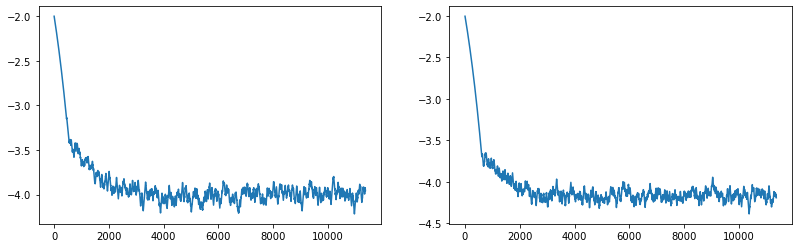

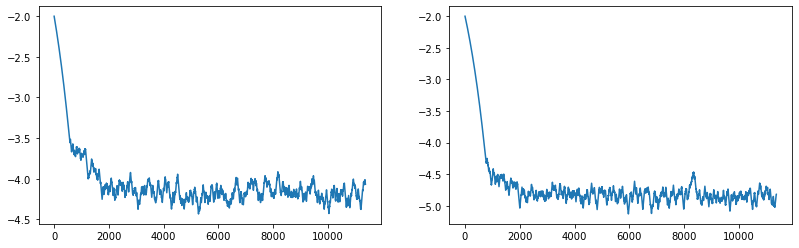

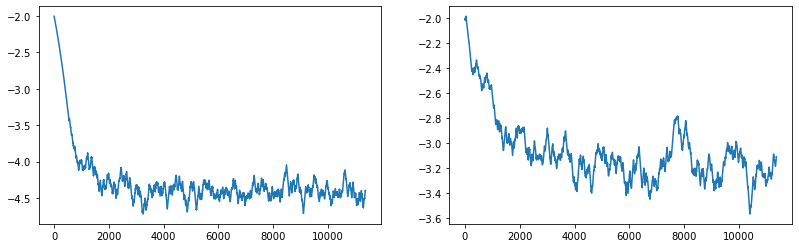

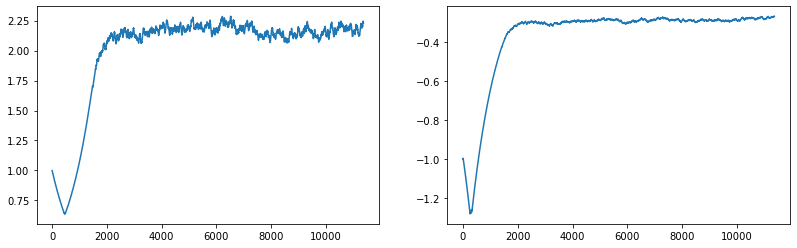

In [7]:
#plotting the parameters' trajectories during the EE algorithm

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols= 2, figsize=(13.5,4))
#ax0.set_title("Generator-Generator Edge parameter", fontsize = 20)
ax0.plot(parlist[0])
#ax1.set_title("Generator-Load Edge parameter", fontsize = 20)
ax1.plot(parlist[1])
plt.savefig("nt"+mod_type+name+'parmater diagnostics0.svg',dpi=300, format="svg")
plt.show()
fig, (ax2,ax3) = plt.subplots(nrows=1,ncols= 2, figsize=(13.5,4))
#ax2.set_title("Generator-Interconnection Edge parameter", fontsize = 20)
ax2.plot(parlist[2])
#ax3.set_title("Load-Load Edge parameter", fontsize = 20)
ax3.plot(parlist[3])
plt.savefig("nt"+mod_type+name+'parmater diagnostics1.svg',dpi=300, format="svg")
plt.show()
fig,(ax4,ax5) = plt.subplots(nrows=1,ncols= 2, figsize=(13.5,4))
#ax4.set_title("Load-Interconnection Edge parameter", fontsize = 20)
ax4.plot(parlist[4])
#ax5.set_title("Interconnection-Interconnection Edge parameter", fontsize = 20)
ax5.plot(parlist[5])
plt.savefig("nt"+mod_type+name+'parmater diagnostics2.svg',dpi=300, format="svg")
plt.show()
fig2,(ax20,ax21) = plt.subplots(nrows=1,ncols=2,figsize=(13.5,4))
#ax20.set_title("triangles parameter", fontsize = 20)
ax20.plot(parlist[6])
#ax21.set_title("2-triangles parameter", fontsize = 20)
ax21.plot(parlist[7])
plt.savefig("nt"+mod_type+name+'parmater diagnostics3.svg',dpi=300, format="svg")
plt.show()

In [8]:
file.write("The estimation resulted in the following parameters: \n"+str(list(EEparams))+"\n")

216

### Constrained Monte-Carlo sampling

In [9]:
#monte-carlo sampling with the constrained algorithm
mean_list,synth,obslist = est.pg_MHergm_conn(startconn,obs,EEparams,countlist, obs_comp,fast_obs_comp,10000000)
sellist = est.selector(synth)
print("The procedure has generated "+str(len(sellist))+" synthetic samples")
Glist2,clustlist,avg_typedeg,ac_list = sc.synth_selection2(sellist,countlist,ordlist)

100%|███████████████████████████████████████████████████████████████████| 10000000/10000000 [10:54<00:00, 15267.62it/s]


427484
98651
The procedure has generated 2416 synthetic samples


100%|████████████████████████████████████████████████████████████████████████████| 2416/2416 [00:00<00:00, 6563.85it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


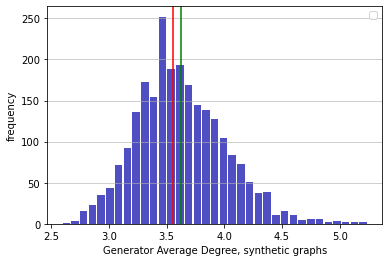

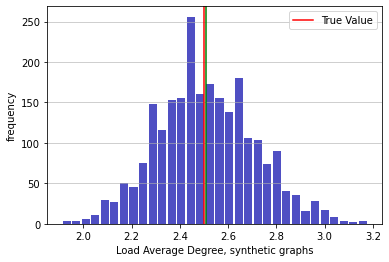

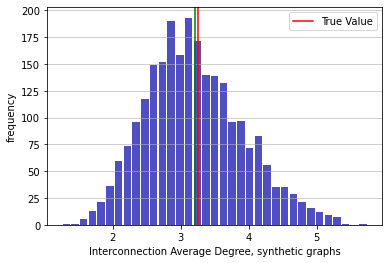

100%|████████████████████████████████████████████████████████████████████████████| 2416/2416 [00:00<00:00, 5223.33it/s]


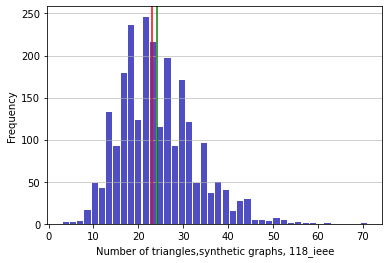

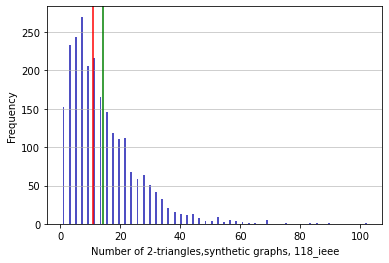

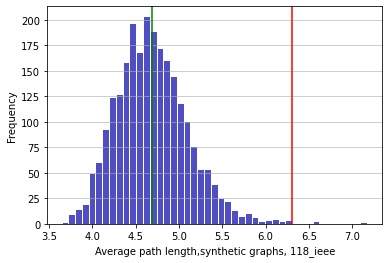

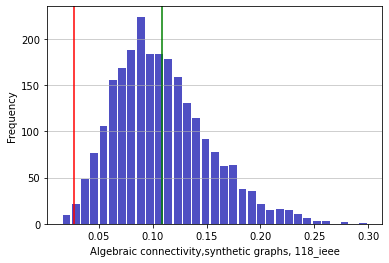

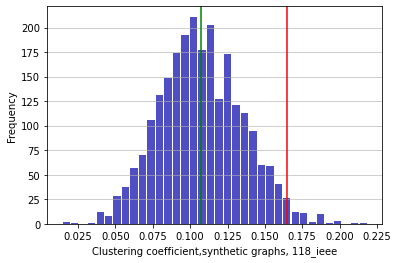

78

In [10]:
#plotting the results

degarray = np.array(avg_typedeg).T

n, bins, patches = plt.hist(x=degarray[0], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Generator Average Degree, synthetic graphs')
plt.ylabel('frequency')
#plt.title('Generators,'+name)
plt.axvline(x=k1,color='red')
plt.axvline(x=np.mean(degarray[0]),color='green')
maxfreq = n.max()
plt.legend(loc='upper right')
plt.savefig('sdeggens'+mod_type+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(k1)

file.write("Generator Average Degree, benchmark value: "+ str(rmean_list[0])+"\n")

file.write("Generator Average Degree: mean "+ str(np.mean(degarray[0])) + " std dev "+ str(np.std(degarray[0])) + "\n" )





n, bins, patches = plt.hist(x=degarray[1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Load Average Degree, synthetic graphs')
plt.ylabel('frequency')
#plt.title('Loads, '+name)
plt.axvline(x=k2,color='red',label='True Value')
plt.axvline(x=np.mean(degarray[1]),color='green')
maxfreq = n.max()
plt.legend(loc='upper right')
plt.savefig('sdegloads'+mod_type+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(k2)

file.write("Load Average Degree, benchmark value: "+ str(rmean_list[1])+"\n")

file.write("Load Average Degree: mean "+ str(np.mean(degarray[1])) + " std dev "+ str(np.std(degarray[1])) + "\n" )


n, bins, patches = plt.hist(x=degarray[2], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Interconnection Average Degree, synthetic graphs')
plt.ylabel('frequency')
#plt.title('Interconnections, '+name)
plt.axvline(x=k3,color='red',label='True Value')
plt.axvline(x=np.mean(degarray[2]),color='green')
maxfreq = n.max()
plt.legend(loc='upper right')
plt.savefig('sdegints'+mod_type+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(k3)

file.write("Interconnection Average Degree, benchmark value: "+ str(rmean_list[2])+"\n")

file.write("Interconnection Average Degree: mean "+ str(np.mean(degarray[2])) + " std dev "+ str(np.std(degarray[2])) + "\n" )


trilist = []
for i in tqdm(range(len(Glist2))):
    trilist.append(sum(nx.triangles(Glist2[i].to_undirected()).values())/3)
trilist2 = [hc.compute_2_triangle(mat) for mat in tqdm(sellist)]


n, bins, patches = plt.hist(x=trilist, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of triangles,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('Triangles, '+name)
plt.axvline(x=genobs[6],color='red')
plt.axvline(x=np.mean(trilist),color='green')
plt.savefig('stris'+mod_type+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(genobs[6])

file.write("Triangles, benchmark value: "+ str(rmean_list[3])+"\n")

file.write("Triangles: mean "+ str(np.mean(trilist)) + " std dev "+ str(np.std(trilist)) + "\n" )


n, bins, patches = plt.hist(x=trilist2, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.3)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of 2-triangles,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('2-Triangles, '+name)
plt.axvline(x=genobs[7],color='red')
plt.axvline(x=np.mean(trilist2),color='green')
plt.savefig('trians2'+name+'.svg',dpi=300, format="svg")
plt.show()

rmean_list.append(genobs[7])
file.write("2-Triangles, benchmark value: "+ str(rmean_list[4])+"\n")
file.write("2-Triangles: mean "+ str(np.mean(trilist2)) + " std dev "+ str(np.std(trilist2)) + "\n" )



paths = [nx.average_shortest_path_length(G.to_undirected()) for G in Glist2]
n, bins, patches = plt.hist(x=paths, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Average path length,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('Avgerage path, '+name)
plt.axvline(x=nx.average_shortest_path_length(nx.from_numpy_matrix(ordmat).to_undirected()),color='red')
plt.axvline(x=np.mean(paths),color='green')
plt.savefig('apl'+name+'.svg',dpi=300, format="svg")
plt.show()
rmean_list.append(nx.average_shortest_path_length(nx.from_numpy_matrix(ordmat).to_undirected()))
file.write("Average path length, benchmark value: "+ str(rmean_list[5])+"\n")
file.write("Average path length: mean "+ str(np.mean(paths)) + " std dev "+ str(np.std(paths)) + "\n" )




n, bins, patches = plt.hist(x=ac_list, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Algebraic connectivity,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('Algebraic connectivity, '+name)
plt.axvline(x=sc.alg_conn(ordmat),color='red')
plt.axvline(x=np.mean(ac_list),color='green')
plt.savefig('acsin'+name+'.svg',dpi=300, format="svg")
plt.show()
rmean_list.append(sc.alg_conn(ordmat))
file.write("Algebraic connectivity, benchmark value: "+ str(rmean_list[6])+"\n")
file.write("Algebraic connectivity: mean "+ str(np.mean(ac_list)) + " std dev "+ str(np.std(ac_list)) + "\n" )




clusts = [sc.clustering_coeff(G.to_undirected()) for G in Glist2]
n, bins, patches = plt.hist(x=clusts, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Clustering coefficient,synthetic graphs, '+name)
plt.ylabel('Frequency')
#plt.title('Avgerage path, '+name)
plt.axvline(x=sc.clustering_coeff(nx.from_numpy_matrix(ordmat).to_undirected()),color='red')
plt.axvline(x=np.mean(clusts),color='green')
plt.savefig('clustcoeff_'+name+'.svg',dpi=300, format="svg")
plt.show()
rmean_list.append(sc.clustering_coeff(nx.from_numpy_matrix(ordmat).to_undirected()))
file.write("Clustering coefficient, benchmark value: "+ str(rmean_list[7])+"\n")
file.write("Clustering coefficient: mean "+ str(np.mean(clusts)) + " std dev "+ str(np.std(clusts)) + "\n" )



In [11]:
file.close()